<h3> SciPython/Practical_classes_2

<h3> Bayesian approach

- fast to calculate
- easy to interpret
- easy to implement

Let's assume we have some categories (for examples: cats and dogs) and $L$ is the category we want to predict. We want to build a model that will predict the category $L$ based on a set of features $(X_1,X_2...,X_n)$. According to the Bayesian Theorem

<br> 
<center> $P(L|X_1,X_2,...,X_n) = \frac{P(X_1,X_2,...,X_n|L)P(L)}{P(X_1,X_2,...,X_n)}$ </center>

<br>

The higher the probability $P(L|X_1,X_2,...,X_n)$ is, the more prone we are to consider $L$ as a proper category. If we have only two categories $L_1$ and $L_2$ we may investigate the ratio

 <br>
<center> $\frac{P(L_1|X_1,X_2,...,X_n)}{P(L_2|X_1,X_2,...,X_n)}$ </center>

which is
<br>
<center> $\frac{P(L_1|X_1,X_2,...,X_n)}{P(L_2|X_1,X_2,...,X_n)} = \frac{P(X_1,X_2,...,X_n|L_1)P(L_1)}{P(X_1,X_2,...,X_n|L_2)P(L_2)}$ </center>

Based on the training data, we approximate the probabilities $P(X_1,X_2,...,X_n|L_i)$ and $P(L_i)$ - we need to assume the distribution function (for example, normal distribution). As a result, we have a generative model. Based on it, we may also generate new data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, 2, centers = 2, random_state = 1, cluster_std = 3) #data and labels (categories), method for generating artificial data

print(X[:10]); print(); print(y[:10])

[[ -5.85599836   4.65179333]
 [ -5.83379108  -3.27474928]
 [  7.43301143   6.88024374]
 [ -8.02210189  -0.9566436 ]
 [-14.71993278  -3.65156829]
 [-14.27229521  -6.66367673]
 [-11.34013232  -3.38759981]
 [-11.34268182  -1.87528181]
 [  1.46070755   1.65116975]
 [-12.73804273  -5.82506401]]

[0 1 0 1 1 1 1 1 0 1]


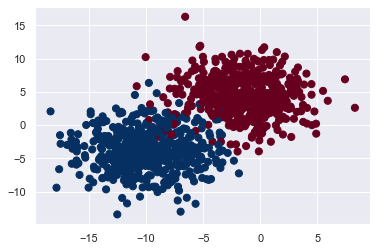

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #divide the data into the training and test sets

<h4>Normal distribution

In [5]:
from sklearn.naive_bayes import GaussianNB #we asuume P(X1,...,Xn |L) is normal 

model = GaussianNB() #create a model
model.fit(X_train, y_train); #fit a model to training data

In [6]:
#check how the model works
y_predicted = model.predict(X_test)
sum([1 for i in range(len(y_test)) if y_test[i] == y_predicted[i]])/len(y_test) #accuracy on the test set

0.975

In [7]:
#for a given data observation we may predict the probability of every category
model.predict_proba([[-5,-1]])

array([[0.33548546, 0.66451454]])

<h4> Exercise1: Consider iris data. Divide all the data into two parts - the training and test sets (9:1). Build a model based on NB approach. Then, check how it works for the test set - what is the accuracy here?

description: https://archive.ics.uci.edu/ml/datasets/Iris/

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

print(X[:10]); print(); print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
model.fit(X_train, y_train)
          
y_predicted = model.predict(X_test)
sum([1 for i in range(len(y_test)) if y_test[i] == y_predicted[i]])/len(y_test)

0.9333333333333333

<h3> Multinomial distribution

In [9]:
from sklearn.naive_bayes import MultinomialNB #multinomial distribution is assumed, appropriate for features that desribe counts of sth

In [10]:
from sklearn.datasets import fetch_20newsgroups #contain over 18K posts regarding on 20 topics

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
categories = ["sci.med", "sci.space", "comp.windows.x"] #choose 3 categories
train = fetch_20newsgroups(subset = "train", categories = categories)
test = fetch_20newsgroups(subset = "test", categories = categories)

In [12]:
print(len(train.data), len(test.data))

1780 1185


In [13]:
train.target_names #categories

['comp.windows.x', 'sci.med', 'sci.space']

In [14]:
print(train.data[0])

From: jra@wti.com (Jim Atkinson)
Subject: How can I detect local vs remote DISPLAY settings?
Reply-To: jra@wti.com
Organization: Wavefront Technologies Inc, Santa Barbara, CA
Lines: 17
Nntp-Posting-Host: barracuda.wti.com
X-Disclaimer: Not a spokesperson for Wavefront Technologies, Inc.

I am trying to find out if my application is running on a local or a
remote display.  A local display being connected to the same system
that the client is executing on.  I have access to the display string
but can I tell from the string?

If the client is executing on host foo then ":0", "unix:0", "foo:0",
and "localhost:0" are all local.  Under Ultrix, I believe that
"local:0" is also a valid display name (a shared memory connection
maybe?).  Are there other strings that I should check for?  Is there a
better way to detect this?

Thank you for any help you can give me.
-- 
Jim Atkinson		Wavefront Technologies, Inc.
jra@wti.com		What, me?  A company spokesperson?  Get real!
=================== Life is

In [15]:
#to analyse the text we need to convert it into numbers

from sklearn.feature_extraction.text import TfidfVectorizer #method TF-IDF is an example how to convert the text into numbers

In [16]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB()) #we make a pipeline, 1. Text->numbers, 2. NB model
model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [17]:
model.fit(train.data, train.target)
categories_predicted = model.predict(test.data)

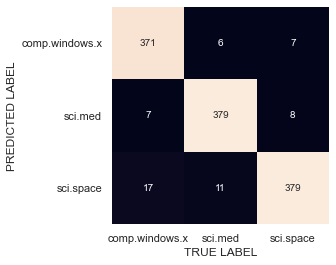

In [18]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, categories_predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, 
            xticklabels = train.target_names, yticklabels=train.target_names)

plt.xlabel("TRUE LABEL")
plt.ylabel("PREDICTED LABEL")
plt.show()

In [19]:
#if we want to predic a new sentence
s = "black hole is a misterious object"
model.predict([s])

array([2], dtype=int64)

<h3> Bayesian networks

<h4> Assumptions </h4>

- take the form of a directed (edges are directed in one direction), acyclic (no cycles) graph (DAG=directd acyclic graph)
- convenient for modeling cause-and-effect relationships

There are
- verticles (variables, features)
- edges (dependencies between features)

Syntax: If $A \rightarrow B$, then we call $A$ a parent of $B$ and $B$ is the child of $A$.

Each variable (represented by a vertex) is conditionally dependent of the parents variables.


$P(X_1=x_1,X_2=x_2,....) = \prod_i P(X_i=x_i|parents(X_i))$



<h4> Example (from Judea Pearl)</h4>

- The owner of the house works far away from his home.
- An alarm has been installed to prevent burglary. Unfortunately, earthquakes can also trigger alarms.
- Neighbors - John and Mary call the homeowner when they hear an alarm (with some probability).

Below is a diagram of this situation:

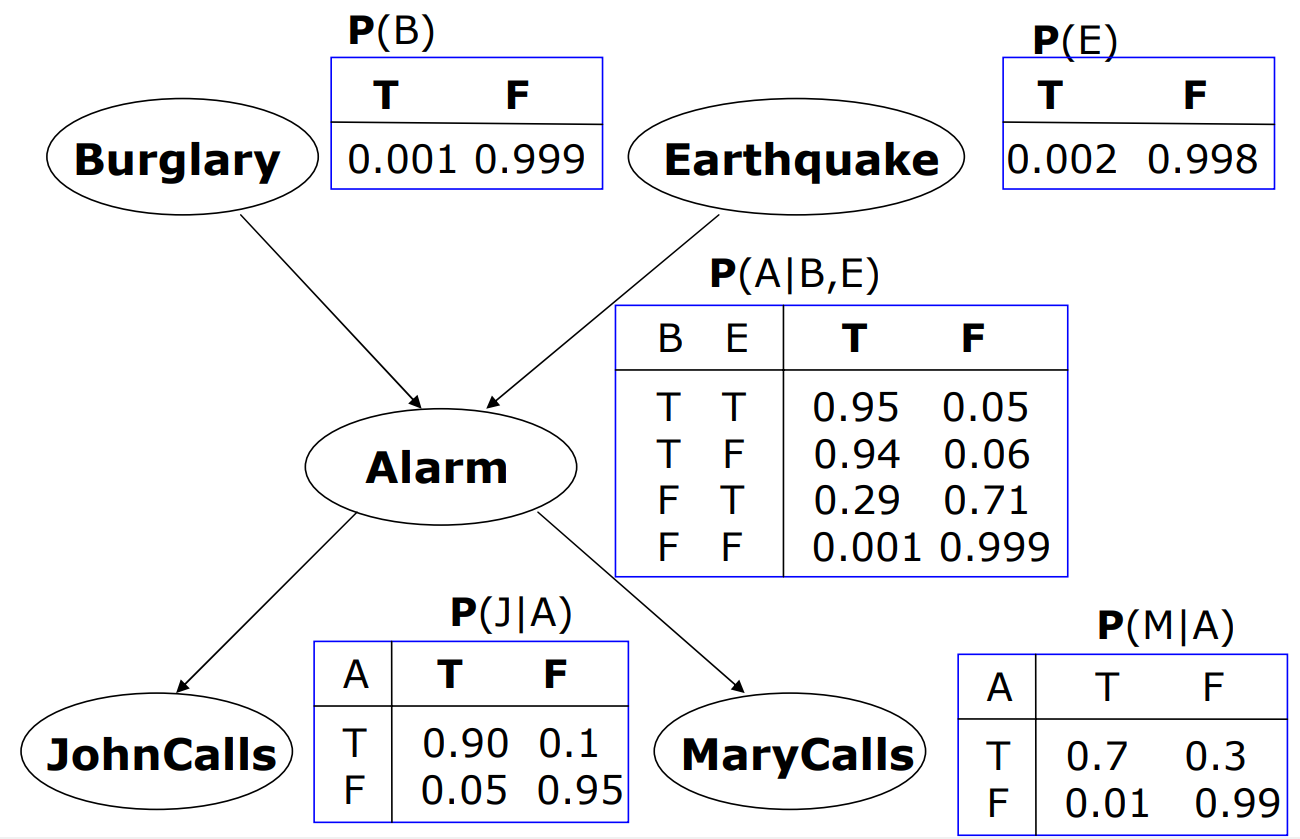

In [20]:
from IPython import display
display.Image("nb.png", width="500", height="500")

<h4> Exercise2: Calculate $P(B=T, E=T, A=T, J=T, M=F)$

In [2]:
0.001*0.002*0.95*0.90*0.3

5.13e-07

<h4> Exercise3: (the reduction in the number of parameters):
    
- How many parameters are needed to describe the cumulative distribution of 5 binary variables?
- How many parameters does the above network have?

In [6]:
print(2**5)
print()
print(2+2+8+4+4)

32

20


<h4> Exercise4: 
Ask the same question as previously for 10 binary variables and the following network topology:

In [7]:
print(2**10)
print()
print(2+4*8+8)

1024

42


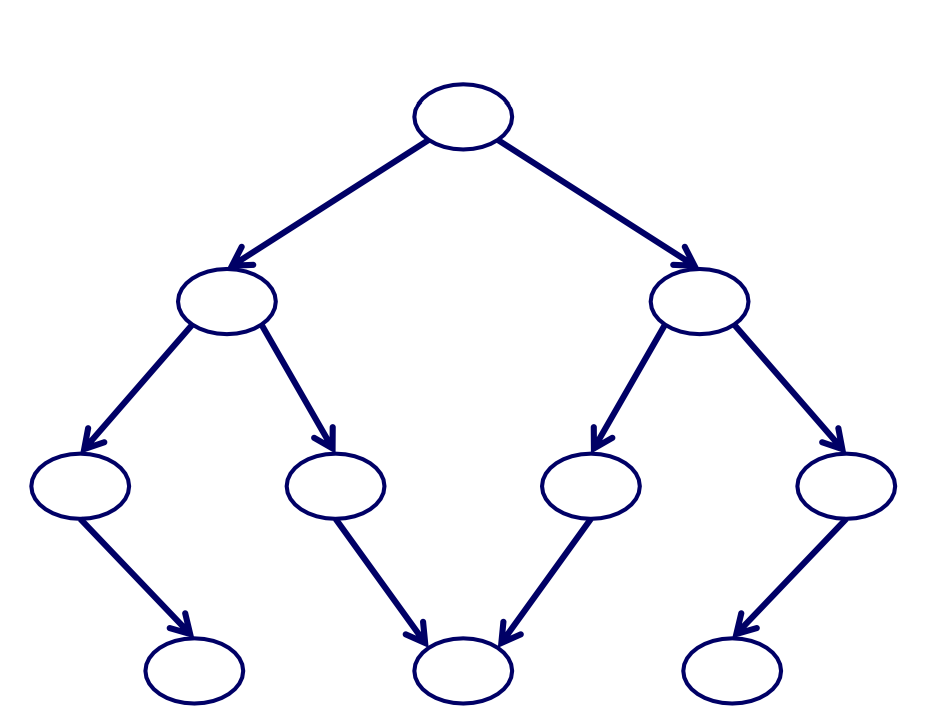

In [21]:
display.Image("nb2.png", width="500", height="500")

And now, some examples in Python

In [10]:
import pandas as pd

In [24]:
import pandas as pd
data = pd.read_csv('bn_data.csv')
print(data)

     fruit tasty   size
0   banana   yes  large
1    apple    no  large
2   banana   yes  large
3    apple   yes  small
4   banana   yes  large
5    apple   yes  large
6   banana   yes  large
7    apple   yes  small
8    apple   yes  large
9    apple   yes  large
10  banana   yes  large
11  banana    no  large
12   apple    no  small
13  banana    no  small


In [25]:
from pgmpy.models import BayesianNetwork

nb_net = BayesianNetwork([('fruit', 'tasty'), ('size', 'tasty')])  #we create a bayesian network with relations: fruit -> tasty and size->tasty

In [26]:
#some easy calculations

from pgmpy.estimators import ParameterEstimator

p = ParameterEstimator(nb_net, data)

print(p.state_counts('fruit'))
print()
print(p.state_counts('size'))
print()
print(p.state_counts('tasty'))

        fruit
apple       7
banana      7

       size
large    10
small     4

fruit apple       banana      
size  large small  large small
tasty                         
no      1.0   1.0    1.0   1.0
yes     3.0   2.0    5.0   0.0


In [27]:
from pgmpy.estimators import MaximumLikelihoodEstimator

mle_model = MaximumLikelihoodEstimator(nb_net, data) #probability estimation based on MLE
print(mle_model.estimate_cpd('fruit'))  
print(mle_model.estimate_cpd('size')) 
print(mle_model.estimate_cpd('tasty'))  

+---------------+-----+
| fruit(apple)  | 0.5 |
+---------------+-----+
| fruit(banana) | 0.5 |
+---------------+-----+
+-------------+----------+
| size(large) | 0.714286 |
+-------------+----------+
| size(small) | 0.285714 |
+-------------+----------+
+------------+--------------+--------------------+---------------------+---------------+
| fruit      | fruit(apple) | fruit(apple)       | fruit(banana)       | fruit(banana) |
+------------+--------------+--------------------+---------------------+---------------+
| size       | size(large)  | size(small)        | size(large)         | size(small)   |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(no)  | 0.25         | 0.3333333333333333 | 0.16666666666666666 | 1.0           |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(yes) | 0.75         | 0.6666666666666666 | 0.8333333333333334  | 0.0           |
+------------+--------------+----

In [28]:
from pgmpy.estimators import BayesianEstimator

est = BayesianEstimator(nb_net, data)
print(est.estimate_cpd('tasty', prior_type='K2')) #adding pseudocounts (1) to eliminate zero values

+------------+--------------------+--------------+---------------+--------------------+
| fruit      | fruit(apple)       | fruit(apple) | fruit(banana) | fruit(banana)      |
+------------+--------------------+--------------+---------------+--------------------+
| size       | size(large)        | size(small)  | size(large)   | size(small)        |
+------------+--------------------+--------------+---------------+--------------------+
| tasty(no)  | 0.3333333333333333 | 0.4          | 0.25          | 0.6666666666666666 |
+------------+--------------------+--------------+---------------+--------------------+
| tasty(yes) | 0.6666666666666666 | 0.6          | 0.75          | 0.3333333333333333 |
+------------+--------------------+--------------+---------------+--------------------+


<h4> Exercise5: Explain the value of 0.75 in the table above (by direct calculation and explanation).

In [8]:
(5+1)/(6+2)

0.75

In [29]:
from pgmpy.estimators import BayesianEstimator

est = BayesianEstimator(nb_net, data)
print(est.estimate_cpd('tasty', prior_type='BDeu', equivalent_sample_size=10)) #another method; BDeu = Bayesian Dirichlet equivalent uniform prior

+------------+---------------------+--------------------+--------------------+---------------------+
| fruit      | fruit(apple)        | fruit(apple)       | fruit(banana)      | fruit(banana)       |
+------------+---------------------+--------------------+--------------------+---------------------+
| size       | size(large)         | size(small)        | size(large)        | size(small)         |
+------------+---------------------+--------------------+--------------------+---------------------+
| tasty(no)  | 0.34615384615384615 | 0.4090909090909091 | 0.2647058823529412 | 0.6428571428571429  |
+------------+---------------------+--------------------+--------------------+---------------------+
| tasty(yes) | 0.6538461538461539  | 0.5909090909090909 | 0.7352941176470589 | 0.35714285714285715 |
+------------+---------------------+--------------------+--------------------+---------------------+


Example

In [30]:
data = pd.DataFrame(np.random.randint(low=0, high=2, size=(5000, 4)), columns=['A', 'B', 'C', 'D'])

model = BayesianNetwork([('A', 'B'), ('A', 'C'), ('D', 'C'), ('B', 'D')])

model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") #by default equivalent_sample_size=5
for cpd in model.get_cpds():
    print(cpd)

+------+--------+
| A(0) | 0.5002 |
+------+--------+
| A(1) | 0.4998 |
+------+--------+
+------+--------------------+---------------------+
| A    | A(0)               | A(1)                |
+------+--------------------+---------------------+
| B(0) | 0.4978030756940284 | 0.49580251848890666 |
+------+--------------------+---------------------+
| B(1) | 0.5021969243059716 | 0.5041974815110933  |
+------+--------------------+---------------------+
+------+---------------------+---------------------+-------------------+--------------------+
| A    | A(0)                | A(0)                | A(1)              | A(1)               |
+------+---------------------+---------------------+-------------------+--------------------+
| D    | D(0)                | D(1)                | D(0)              | D(1)               |
+------+---------------------+---------------------+-------------------+--------------------+
| C(0) | 0.5080824408971509  | 0.49091806515301084 | 0.512202562538133 | 0.5

Ocena modelu

In [31]:
from pgmpy.estimators import BDeuScore, K2Score, BicScore

bdeu = BDeuScore(data)
k2 = K2Score(data)
bic = BicScore(data)

#the higher parameter, the better model is
print(bdeu.score(model))
print(k2.score(model))
print(bic.score(model))

-13888.382055499214
-13891.931340456125
-13898.117101769098


<h4> Exercise6: Generate data with 10,000 rows and 3 columns. Let the first two columns (A, B) contain random integers in the range $<-2.2>$. The third column (C) is a linear combination of the first two columns $C = 2A-3B$. Build two network topologies, i.e. $(A ->C, B->C)$ and $(A->B, B->C)$. Evaluate which network seems to better reflect the data structure. Explain why.


In [38]:
import numpy as np
data = pd.DataFrame(np.random.randint(-2, 2, size=(10000, 2)), columns=list('AB'))
data['C'] = 2*data['A'] - 3*data['B']

data.head()

,A,B,C
0,-2,1,-7
1,1,-1,5
2,-2,1,-7
3,1,-1,5
4,1,-2,8


In [40]:
bdeu = BDeuScore(data)
k2 = K2Score(data)
bic = BicScore(data)


model = BayesianNetwork([('A', 'B'), ('B', 'C')])
model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") #by default equivalent_sample_size=5
print(bdeu.score(model))
print(k2.score(model))
print(bic.score(model))

print()

model = BayesianNetwork([('A', 'C'), ('B', 'C')])
model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") #by default equivalent_sample_size=5
print(bdeu.score(model))
print(k2.score(model))
print(bic.score(model))

-41733.660192369
-41891.809931253185
-41878.55525772662

-27847.92453899174
-28728.003743542504
-28709.10200169222


<h4> Network topology searching - hard (NP problem)

1) Brute Force (ExhaustiveSearch)

2) Greedy algorithm (HillClimbSearch)

3) Locate independent variables (e.g. chi2 test) - this will limit the number of possibilities (ConstraintBasedEstimator)

4) MMHC algorithm - a combination of 2 and 3 and a few more nuances

In [31]:
data = pd.DataFrame(np.random.randint(-2, 2, size=(10000, 2)), columns=list('AB'))
data['C'] = data['A'] + data['B']

data.head()

,A,B,C
0,0,-1,-1
1,0,-1,-1
2,0,0,0
3,1,0,1
4,0,-1,-1


In [32]:
from pgmpy.estimators import ExhaustiveSearch
bic = BicScore(data)
es = ExhaustiveSearch(data, scoring_method=bic)
best_model = es.estimate()
print("The network with the highest BIC")
print(best_model.edges())

print()
print("BIC/Network")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

The network with the highest BIC
[('A', 'C'), ('B', 'C')]

BIC/Network
-28195.386673523735 [('A', 'C'), ('B', 'C')]
-28231.91595876821 [('B', 'C'), ('B', 'A'), ('C', 'A')]
-28231.91595876821 [('A', 'C'), ('B', 'C'), ('B', 'A')]
-28231.91595876821 [('A', 'B'), ('A', 'C'), ('C', 'B')]
-28231.915958768215 [('B', 'A'), ('C', 'A'), ('C', 'B')]
-28231.915958768215 [('A', 'B'), ('C', 'A'), ('C', 'B')]
-28231.91595876822 [('A', 'B'), ('A', 'C'), ('B', 'C')]
-32663.581702098425 [('B', 'A'), ('C', 'A')]
-32663.67667492485 [('A', 'B'), ('C', 'B')]
-37290.01360123623 [('B', 'C'), ('C', 'A')]
-37290.01360123623 [('A', 'C'), ('C', 'B')]
-37290.013601236235 [('C', 'A'), ('C', 'B')]
-41721.67934456644 [('A', 'C')]
-41721.679344566444 [('C', 'A')]
-41721.77431739286 [('B', 'C')]
-41721.77431739287 [('C', 'B')]
-41758.20862981091 [('A', 'C'), ('B', 'A')]
-41758.20862981092 [('A', 'B'), ('C', 'A')]
-41758.20862981092 [('A', 'B'), ('A', 'C')]
-41758.30360263734 [('B', 'C'), ('B', 'A')]
-41758.303602637345

In [33]:
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))
print(best_model.edges())


[('A', 'C'), ('B', 'C')]


<h4> Exercise7: The number of possible network topologies for $n$ features is expressed by the following recursive formula
   

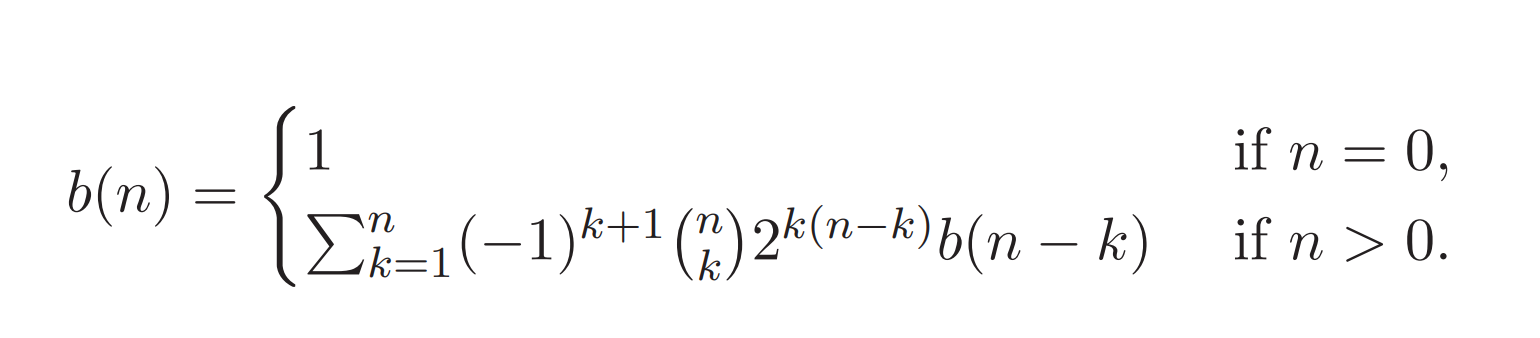

In [34]:
display.Image("bay.png", width="500", height="500")

In [42]:
# exercise 7

from math import comb

def b(n):
    if n == 0:
        return 1
    elif n > 0:
        return sum([(-1)**(k+1)*comb(n, k)*2**(k*(n-k))*b(n-k) for k in range(1,n+1)])

print(b(3))
print()
print(b(10))

25

4175098976430598143


<h4> Implement this formula and check it for 3 features (example above). How many possible networks are there for 10 features?


Bayesian networks were developed on the basis of:
- https://notebook.community/pgmpy/pgmpy_notebook/notebooks/9.%20Learning%20Bayesian%20Networks%20from%20Data

Worth reading:

- https://www.frontiersin.org/articles/10.3389/fgene.2019.01196/full
- https://biodatamining.biomedcentral.com/articles/10.1186/1756-0381-6-6
- https://www.nature.com/articles/s42003-022-03243-w